[1. Introduction](#1)

[2. Why Logistic Regression ?](#2)

* [2.1 Sigmoid Function](#2.1)

[3. Importing Libraries](#3)

[4. Importing Training and Test Dataset](#4)

[5. Dataset Column Details](#5)

[6. Explanatory Data Analysis - Training Data](#6)

* [6.1 Number of Rows and Column](#6.1)

* [6.2 Missing Data Analysis](#6.2)

* [6.3 Heat Map](#6.3)

* [6.4 Verifing Unique Values ](#6.4)

* [6.5 Visual Representation of Target based on features](#6.5)

* [6.6 Statistical Analysis of Target based on features](#6.6)

* [ 6.7 Visual Representation of features ](#6.7)

[7. Data Preprocessing](#7)

* [7.1 Handling missing data of age](#7.1)

* [7.2 Handling missing data of Cabin](#7.2)

* [7.3 Handling missing data of Embarked](#7.3)

[8. Encoding Categorical Features](#8)

[9. Analysis Numerical columns](#9)

[10. Train and Test Split](#10)

[11. Feature Scaling](#11)

[12. Logistic Regression Model](#12)

[13. Evaluation](#13)

* [13.1 Confusion Matrix](#13.1)

* [13.2 Accuracy, Precision and Recall](#13.2)

* [13.3 Classification Report](#13.3)

[14. Setting New Threshold](#14)

* [14.1 Confusion Matrix for updated Threshold](#14.1)

* [14.2 Accuracy, Precision and Recall](#14.2)

* [14.3 Classification Report for updated Threshold](#14.3)

[15. Test.csv Analysis](#15)

* [15.1 Missing Value Analysis of Test.csv](#15.1)

* [15.2  Heat Map for missing value of Test.csv](#15.2)

[16. Data Preprocessing for Test.csv](#16)

* [16.1 Handling Missing Data of Age](#16.1)

* [16.2 Handling Missing Data of Cabin](#16.2)

* [16.3 Handling Missing Data of Fare](#16.3)

[17. Dropping Insignificant Features](#17)

[18. Encoding Categorical Features of Test.csv](#18)

[19. Feature Scaling](#19)

[20. Building Logistic Regression](#20)

[21. Conclusion](#21)





<a id="1"></a> <br>
# 1. Intoduction

On April 15, 1912, during the maiden voyage of Titanic, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Logistic Regression Machine Learning algorithm is modeled, to a predictive the answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
 

<a id="2"></a> <br>
# 2. Why Logistic Regression ?

For the "Titanic - Machine Learning from Disaster" data set we have to build a model, which would predict the person who traveled is survived or not and the result belongs to two discrete categories. A logistic approach fits best when the task that the machine is learning is to predict two discrete classes like Yes/No, True/False, Sucess/Failure, etc.

Logistic regression is a statistical analysis method used to predict the target variables which belong to discrete categories. It is the most commonly used machine learning algorithm when it comes to binary classification.

It predicts the probability of occurrence of an event using a logistic function also known as the sigmoid function and maps its outcome into two classes 0 or 1.

<a id="2.1"></a> <br>
# 2.1.Sigmoid Function

The sigmoid function, also called logistic function is an ‘S’ shaped curve and it takes any value as input but will have only two values as output, i.e., 0 and 1. It can be represented by equation


  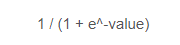

Where e is known as Euler's number and its value is approximately 2.71828.

The S cure of logistic function looks like below

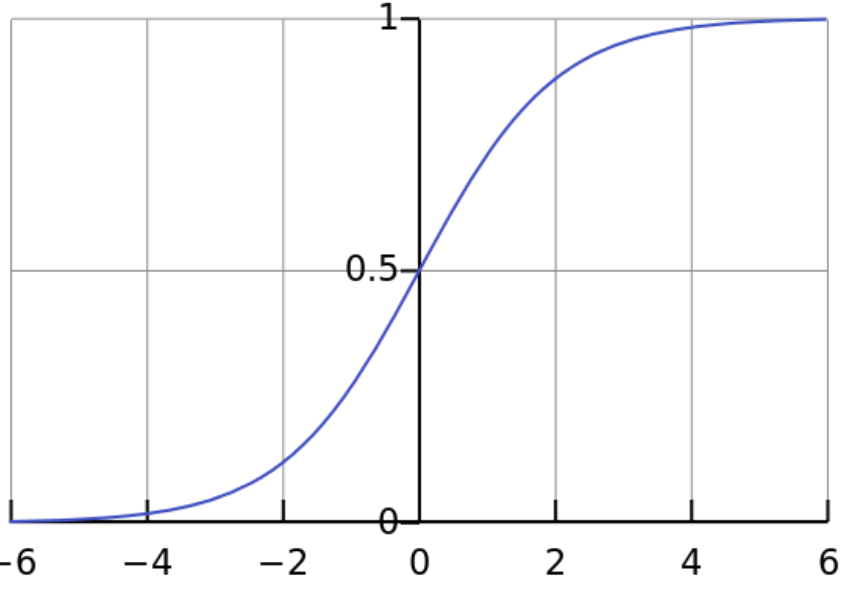


From the curve, it is clear that when X tends to positive or negative infinity, the Y takes 1 and 0 simultaneously. 

The output of the sigmoid function is mapped to 1 or 0 based on threshold value 0.5 (Threshold value is 0.5 by default)

* If value of Probability of occurence of the event > 0.5, sigmoid function output will be 1
* If value of Probability of occurence of the event < 0.5, sigmoid function output will be 0 

<a id="3"></a> <br>
# 3. Importing Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Library for feature Scaling
from sklearn.preprocessing import RobustScaler

#Libraries for logistic Regression Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Library for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<a id="4"></a> <br>
# 4. Importing Training and Test Dataset

As per [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) dataset there two seperate csv files for training and test data.

training data set is imported to train_data and test data is imported to test_data

In [ ]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

<a id="5"></a> <br>
# 5. Dataset Column Details

In [ ]:
train_data.columns

In [ ]:
train_data.head()

In [ ]:
test_data.columns

In [ ]:
test_data.head()

Dataset details are below :  

* PassengerId - Indicates the passenger number
* Survived - Indicates if the passenger travelled is survived or not. 
* Pclass - Indicates which class passenger belows
* Name - Provides Names details of passenger
* Sex - Indicates sex/gender of passenger
* Age - Indicates age of passenger
* SibSp - Provides information about number of sibiling/spouse accompaning 
* Parch  - Provides information about number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Provides information about Cabin number, NaN specifies no cabin allocated
* Embarked - Port of Embarkation




<div class="alert alert-block alert-info"> However, we can see there is no Survived column in the test data. Evaluation can only be done when we can compare our predicted target with the actual target.

So to perform evaluation, I will be splitting training data provided into training and test data. Once it is done, the original training data provided will be used to predict test data output.</div>

<a id="6"></a> <br>
# 6. Explanatory Data Analysis - Training Data

<a id="6.1"></a> <br>
### 6.1 Number of Rows and Column

In [ ]:
train_data.shape

No: of rows of training dataset = 891

No:of columns of training dataset = 12

<a id="6.2"></a> <br>
### 6.2 Missing Data Analysis

In [ ]:
train_data.isnull().sum()

Those column which have  0 against them,  indicates that there are no null values.

Here there are null values are for Age, Cabin and Embarked.

Number of null values for:
* Age - 177
* Cabin - 687
* Embarked - 2       

<a id="6.3"></a> <br>
### 6.3 Heat Map

* Heat Map To check correlation between numerical features

In [ ]:
train_data_num_col = train_data.select_dtypes(exclude=['object']).columns
train_data_num = train_data[train_data_num_col]

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='Oranges');

In [ ]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

* Heat Map To Highlight Missing Value

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="ocean")

The train_data.isnull() will provide a tabular output with boolean False or True. Where False will indicate the value is not missing and True will indicates a missing value. By using seaborn we can create the above heat map where the white line indicates a missing value in the column or we can say it stands for every True value.

From the heat map visualization, it is very evident that only a small proportion of rows have Cabin value. Age is also significantly missing and there are two lines for Embarked.


<a id="6.4"></a> <br>
### 6.4 Verifing Unique Values

As per data dictionary of dataset following column have unique discrete values
1. survival - 0 = No, 1 = Yes
1. pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
1. embarked - C = Cherbourg, Q = Queenstown, S = Southampton

* Verifying unique value of survival

In [ ]:
train_data['Survived'].value_counts()

* Verifying unique value of Pclass

In [ ]:
train_data['Pclass'].value_counts()

* Verifying unique value of Embarked

In [ ]:
train_data['Embarked'].value_counts()

There is no mismatch in the unique value provided in the dataset. The number aganist each unique value represents number of records belonging to that particular category.

<a id="6.5"></a> <br>
### 6.5 Visual Representation of Target based on features

* Survival Vs Demise

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=train_data, palette="Set3")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From the above visual plot of training set, it is clear that number of person survived is less than number of person demise.</p>
</div>

* Survival based on sex

In [ ]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=train_data,palette="Set3");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above visual states, most people who didnot survive are much more likely to be male and people who survived are much likely to be female.</p>
</div>


* Survival based on Pclass - Passenger Class

In [ ]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_data,palette="Set3");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot indicates. people not survived belong to passenger class 3 or cheapest ticket class.</p>
</div>

* Survival based on Pclass and Sex

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_data,palette="Set3");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Above plot gives a deeper picture of people not survived. 
    
PClass 3 - The Majority of male and half of female crowd could not make up to survive.
    
PClass 2 and 1 - Almost all who did not survive are male.
    
    </p>
</div>

* Survival based on Embarked 

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_data,palette="Set3");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

    </p>
</div>

* Survival based on Embarked and Pclass

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=train_data,palette="Set3");
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Embarked S - Majority of people died belong to PClass  3.
Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less.
Embarked Q - Here Pclass 3 only have death rate.

    </p>
</div>

* Survival based on Fare

In [ ]:
sns.displot(data=train_data, x="Fare",hue='Survived',kind ='kde')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1645C5;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
The Maximum of people who could not survive were those who bought the ticket with low fare.
    </p>
</div>

<a id="6.6"></a> <br>
### 6.6 Statistical Analysis of Target based on features

* Survival based on Sex

In [ ]:
pd.crosstab(train_data.Sex,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Out of total females traveled 74.2% of them could survive but  only 18.9% of total male traveled could survive.

    </p>
</div>

* Survival based on Pclass

In [ ]:
pd.crosstab(train_data.Pclass,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Pclass shows, 62.96% of PClass 1 could survive, and 47.28% of Pclass2 could survive and 24.24% of PClass3 could survive. 

    </p>
</div>

* Survival based on Embarked

In [ ]:
pd.crosstab(train_data.Embarked,train_data.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel1')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistical analysis of survival based on Embarked shows, 55.36% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33.7% of Embarked s could survive. 

    </p>
</div>

<a id="6.7"></a> <br>
### 6.7 Visual Representation of features 

* Visual representation of age

In [ ]:
plt.figure(figsize=(10, 3))
sns.histplot(train_data['Age'].dropna(),kde=True,color='purple',bins=30)

Age distribution visualisation, clearly shows skew towards younger passengers. 

If more details of age group is to be seen, we can use cufflinks.

In [ ]:
cf.go_offline()
train_data['Age'].iplot(kind='hist',bins=35)

From cufflinks visualisation, it is much more clear about passenger age distribution. The passgeners are more likely to belong to age group grom 18-33 and there are quite few infant passengers from 0-2. cufflinks visualisation allows to create an interactive plot, like can magnify, zoom in zoom out and much more options. 

* Visualisation of SibSp (Siblings/Spouses )

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=train_data, palette='Spectral_r')

The above visualisation clearly states most of the people travelled didnot have sibling or spouse

* Visualisation of Parch  feature

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',data=train_data,palette='CMRmap')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

* Joint plot of SibSp and Parch

As Visual representation of SibSp and Parch shows there majority where single passengers, so we can use a joint map to check the distribution.

In [ ]:
sns.jointplot(x='SibSp',y='Parch',data=train_data,color='blue',kind='kde', fill =True);

* 3D Visualisation of a person with features Name,Sex and Age

In [ ]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(train_data, x='Name', y='Sex', z='Age', color='Age')
fig.show()

Each point, represents a person and it shows name, sex and age. Color indicator is Age.

<a id="7"></a> <br>
# 7.Data Preprocessing

As we already know we have missing data for Age, Cabin and Embarked.

Number of missing data for:
* Age - 177
* Cabin - 687
* Embarked - 2     

<a id="7.1"></a> <br>
### 7.1  Handling missing data of Age

In [ ]:
train_data['Age'].isnull().sum()

There are  177 null values in age column.

We can use imputing function to fill missing age data, by finding dependency of age over the Pclass variable, as we have already seen 3rd class survival rate is very less. For this first we can visualise this distribution using a boxplot with age and Pclass. 

Boxplot, box indicates the interquartile Range(IQR) with median as central line.  Maximum value that is the line end at top is equal to  Q3+1.5* IQR and minimum line at bottom is equal to Q1-1.5* IQR. If there is any circle outside the extreme lines, it indicates there is outlier in the data.

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=train_data)
plt.title('Age over Pclass')

From the boxplot it is very clear that older people are in Pclass 1 and so on. So to impute age, we can use below code.
Also the median of Pclass1 = 37, Pclass2 = 29 and PClass3 = 24.

First we can write an if-else struture to define impute_train_age(), which will return age, whose value will be median of that particular Pclass.

In [ ]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

As we have defined function impute_train_age() with cols as a tuple, when we call the function it will return the age as per the PClass value.

So next we can replace the null value of Age column using function impute_train_age().

In [ ]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_train_age,axis=1)

Now, if we run below code, it will give number null values as zero.

In [ ]:
train_data['Age'].isnull().sum()

<a id="7.2"></a> <br>
### 7.2  Handling missing data of Cabin

In [ ]:
train_data['Cabin'].isnull().sum()

From 891 rows, for 687 rows Cabin have null value, moreover, cabins are represented as C85, C123 etc.

So we can drop this column.

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
train_data.head()

We can see Cabin column is removed.

<a id="7.2"></a> <br>
### 7.2  Handling missing data of Embarked

In [ ]:
train_data.isnull().sum()

Only two rows of Embarked is missing, so we can drop those two rows.

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Now there is no more missing data.

<a id="8"></a> <br>
# 8  Encoding Categorical Features

In [ ]:
train_data.info()

From train_data.info(), it is clear that we have 4 categorical variables in our dataset. They are Name, Sex, Ticket and Embarked.

Features Name and Ticket will have no significant meaning for determining target, so we can drop those two. Where as Sex and Embarked feautres will have to be encoded before builiding model.

In [ ]:
train_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_data.head()

Now only Columns Sex and Embarked contain categorical variables, they should be encoded before building the model. 

For enoding categorical data, dummy variable is to be created for each discrete categorical variable in each column ( here for columns Sex and Embarked ) which can be done by using pandas.get_dummies() which will return dummy-coded data.

Here column Sex contains two variables male and female and Embarked contains 3 cities, C = Cherbourg, Q = Queenstown, S = Southampton.

For Embarked column, a dummy variable is to be assigned to each city. If our data does not belong to C and Q, it clearly means it will belong to S. This is called multicolinearity or dummy variable trap. That is by using one feature(s) we can predict another feature. To avoid this we will have to drop one dummy variable.

Likewise for column Sex, for males and females, we will assign a dummy variable and we will have to drop one dummy variable from it. Because if the column is not male it indicates it will be female.

Thus we can say if we drop one dummy variable no relevant information will be lost as other dummy variables can explain dropped feature fully. So if there are n dummy variables, n-1 dummy variables will be able to predict the value of the n-th dummy variable.

In pandas.get_dummies(), by using parameter drop_first = True, it will drop first dummy variable, thus it will give n-1 dummies out of n categorical levels by removing the first level.

In [ ]:
train_data = pd.get_dummies(train_data, columns = ['Sex'], drop_first=True)
train_data = pd.get_dummies(train_data, columns = ['Embarked'], drop_first=True)



Now train_data.head() will have new columns replaced by columnname_discrete values.

In [ ]:
train_data.head()

Categorical encoded column name is created in alphabetic order and is placed at end of the columns of dataset. So the dropped column will be first alphabet of that column of that category.

Here column Sex is replaced by Sex_male and Sex_female is dropped.
Also Embarked is replaced by Embarked_Q and Embarked_S and Embarked_C is dropped.

Now all the column have numberical data.


<a id="9"></a> <br>
# 9. Analysis Numerical columns

As PassengerId is like index, it does have any significance for building model and also it will loose its meaning as index when we do feature scaling. So it can dropped.

In [ ]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [ ]:
train_data.head()

<a id="10"></a> <br>
# 10. Train and Test Split

As discussed earlier, for test.csv there is no survivial data. So for test and train split, I will be using train_data as we cannot perform evaluation if we donot have target in our evaluation dataset. 

Once evaluation part is done, we can predict target (Survived or not) of test_data.csv

In [ ]:
X = train_data.drop(['Survived'],axis = 1)
y = train_data['Survived']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

<a id="11"></a> <br>
# 11. Feature Scaling

Feature Scaling is scaling all your features to make sure they all take values on the same scale. It prevents one feature to dominate over the other. Feature Scaling is done after we split the dataset into the training set and test set and it is applied to the training set. 

For feature scaling, we use the fit_transform() method for the training set and the transform() method for the test set.

* fit_transform() : - It is applied only for training set. It contain two methods fit() and transform(). Fit() will do all the mathematical calculation and will get the mean and standard deviation of the data. So it is only done to training set, as we donot want test data values to be known by the model. As we consider test data as real data or live data. transform() method will apply the calculated values to the dataset or it transforms the data to fit the model.

* transform() :- The transform() method applied to test set and test data are  transformed or scaled using the model parameters that were learned on applying the fit method to the training dataset.


In [ ]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)


<a id="12"></a> <br>
# 12. Logistic Regression Model

In [ ]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

* Predicting target

In [ ]:
y_pred = LogisticRegression_model.predict(X_test)

In [ ]:
y_pred

<a id="13"></a> <br>
# 13. Evaluation

<a id="13.1"></a> <br>
### 13.1 Confusion Matrix

Confusion matrix is used for summarizing the performance of a classification algorithm. It contains :
* True Positive : Positive outcome is correctly predicted as positive.
* True Negative : Negative outcome is correctly predicted as negative.
* False Positive: Negative outcome is wrongly predicted as positive.
* False Negative: Positive outcome is wrongly predicted as negative.

* Statistical Representation of Confusion Matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

* Visual Representation of Confusion Matrix

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()

<a id="13.2"></a> <br>
### 13.2 Accuracy, Precision and Recall

* Accuracy : It is correctly predicted outcome to total outcomes.

         Accuracy = (TP+TN)/(TP+FP+FN+TN)
         
          
* Precision : It tells us if we have predicted a positive outcome, how much we are sure it will be true positive. In mathematicaly we can say, it is the proportion of true positive on all positives predictions.

         Precision = TP/(TP+FP)
         
         
* Recall : It is the proportion of true positives on all actual positive elements. Recall is also known as true positive rate.  
            
         Recall = TP/(TP+FN)

In [ ]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy and Precision are indeed good. But only 68.33% of total positive cases, this classifier could predict correctly.

<a id="13.3"></a> <br>
### 13.3 Classification Report

A classification report is a performance evaluation metric in machine learning. 

F1 is the weighted harmonic mean of the precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)



In [ ]:
print(classification_report(y_test, y_pred))

Precision about who survived and not survived is good. Recall and F1 score is good for who didnot survive, but is okay for those who survived.

<a id="14"></a> <br>
# 14. Setting New Threshold  

By default threshold of sigmoid function is 0.5. Here we can set threshold to new calue and check if it is improving.

In [ ]:
prediction_prob = LogisticRegression_model.predict_proba(X_test)[:,1]

prediction_prob[prediction_prob > 0.6] = 1
prediction_prob[prediction_prob <= 0.6] = 0

<a id="14.1"></a> <br>
### 14.1 Confusion Matrix for updated Threshold

* Statistical Representation of Confusion Matrix

In [ ]:
confusion_matrix_prob =pd.crosstab(y_test,prediction_prob)
confusion_matrix_prob

* Visual Representation of Confusion Matrix

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix_prob, annot=True, fmt='d', cmap='rainbow')
plt.show()

<a id="14.2"></a> <br>
### 14.2 Accuracy, Precision and Recall

In [ ]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, prediction_prob)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, prediction_prob)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, prediction_prob)))

<a id="14.3"></a> <br>
### 14.3 Classification Report for updated Threshold

In [ ]:
print(classification_report(y_test,prediction_prob))

After changing threshold, considering all evaluation details, there is not much positive impact. So it is good to go with threshold = 0.5.

<a id="15"></a> <br>
# 15. Test.csv Analysis

<a id="15.1"></a> <br>
# 15.1 Missing Value Analysis of Test.csv

In [ ]:
test_data.isnull().sum()

<a id="15.2"></a> <br>
# 15.2 Heat Map for missing value of Test.csv

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="copper")

From Test data out of 418 rows, we have 86 values missing for age, 327 for cabin and 1 for Fare.

Age will have to fill the null values using median. This can be done in the similar way that is done to training dataset.
As Cabin is having majority of data missing as well as we dropped it in train_data, so we can drop Cabin column for test data also. As there is only 1 value missing for Fare, we can provide mean of fare value to it.

<a id="16"></a> <br>
# 16. Data Preprocessing for Test.csv 

<a id="16.1"></a> <br>
# 16.1 Handling Missing Data of Age

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=test_data,palette='pink_r')
plt.title('Age over Pclass')

As we have created impute_train_age() for handling missing data of test_data, we can define and call new function impute_test_age() to handle missing data of test data.

In [ ]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [ ]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_test_age,axis=1)

In [ ]:
test_data['Age'].isnull().sum()

<a id="16.2"></a> <br>
# 16.2 Handling Missing Data of Cabin

In [ ]:
test_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
test_data.isnull().sum()

Now only Fare is having missing value.

<a id="16.3"></a> <br>
# 16.3 Handling Missing Data of Fare

In [ ]:
null_columns=test_data.columns[test_data.isnull().any()]
row_num = (test_data[test_data["Fare"].isnull()][null_columns])
row_num

In [ ]:
test_data.iloc[152, :]

Missing value of Fare belong to a male passenger whose PassengerId 1044 from Pclass 3 and age is 60.5

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(test_data['Fare'].dropna(),kde=True,color='purple',bins=30)

From the plot it is clear, Fare is skewed toward lower value, so we can go for median.

In [ ]:
Fare_median = test_data["Fare"].median()
Fare_median

In [ ]:
test_data = test_data.replace(np.NaN,14.4542)

In [ ]:
test_data.iloc[152, :]

Fare Value for PassengerId 1044 is replaced by 14.4542

In [ ]:
test_data.isnull().sum()

<a id="17"></a> <br>
# 17. Dropping Insignificant Features

As we know Name, Ticket and PassengerId columns are not having any significance for target prediction. So we can drop those features.

In [ ]:
test_data.head()

As Ticket and Name does have any significant impact on Target, we have dropped it from train_data, so we will drop same from test_data also.

In [ ]:
#Saving PassengerID for submission
test_pass = test_data['PassengerId']
test_pass

In [ ]:
test_data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [ ]:
test_data.head()

<a id="18"></a> <br>
# 18  Encoding Categorical Features of Test.csv

In [ ]:
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'], drop_first=True)

In [ ]:
test_data.head()

<a id="19"></a> <br>
# 19.  Feature Scaling 

Here we are having different dataset for training and test. So thre is no need to split the dataset. We can directly apply feature scaling.

In [ ]:
X1_Train = train_data.drop(['Survived'],axis = 1)
y1_Train = train_data['Survived']

In [ ]:
cols = test_data.columns

scal = RobustScaler()

X1_Train = scal.fit_transform(X1_Train)
test_data = scal.transform(test_data)

In [ ]:
X1_Train = pd.DataFrame(X1_Train,columns=cols)
test_data = pd.DataFrame(test_data,columns=cols)

In [ ]:
X1_Train.head()

In [ ]:
test_data.head()

<a id="20"></a> <br>
# 20.  Building Logistic Regression 

In [ ]:
LogisticRegression_model.fit(X1_Train,y1_Train)

In [ ]:
y_pred_2 = LogisticRegression_model.predict(test_data)

In [ ]:
y_pred_2

<a id="21"></a> <br>
# 21. Conclusion

* Survival is highly dependent on Pclass. This indicates the majority of people who could afford enough money to get in Pclass 1, were most likely to survive.
    * 62.96% of PClass 1 could survive
    * 47.28% of Pclass2 could survive 
    * 24.24% of PClass3 could survive
    

* Majority of the passenger who could survive are females.
    * Out of total females traveled 74.2% of them could survive.
 
* Majority of the male passengers could not survive.
    * 18.9% of total male traveled could only survive

* Port from which the passengers have boarded also has a significant impact on the survival rate.
    * 55.36% of Embarked C could survive
    * 38.96% of Embarked Q could survive
    * 33.7% of Embarked s could survive



In [ ]:
submission = pd.DataFrame({'PassengerId': test_pass, 'Survived': y_pred_2})
submission

In [ ]:
submission.to_csv('submission.csv',index=False)